<a href="https://colab.research.google.com/github/omololaesther/Python/blob/main/Breast_Cancer_Ana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Analysis 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bc_data = pd.read_csv('/content/Breast_Cancer.csv')

In [3]:
bc_data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
bc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [6]:
bc_data.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


# **Data Visualization**

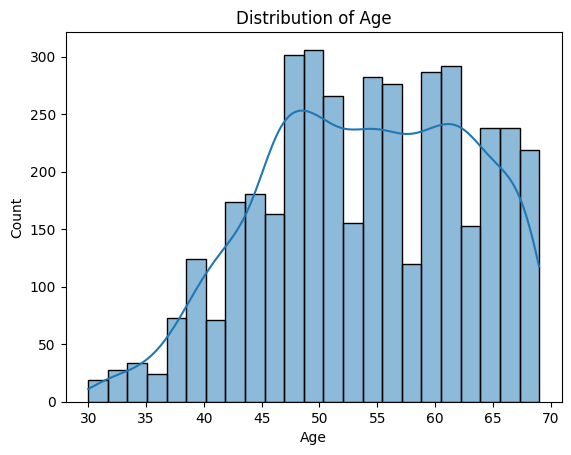

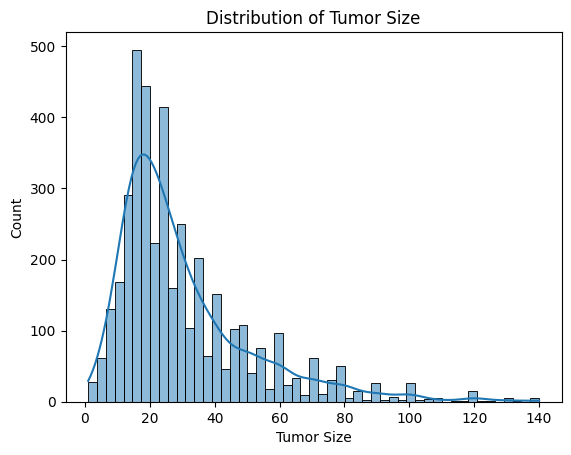

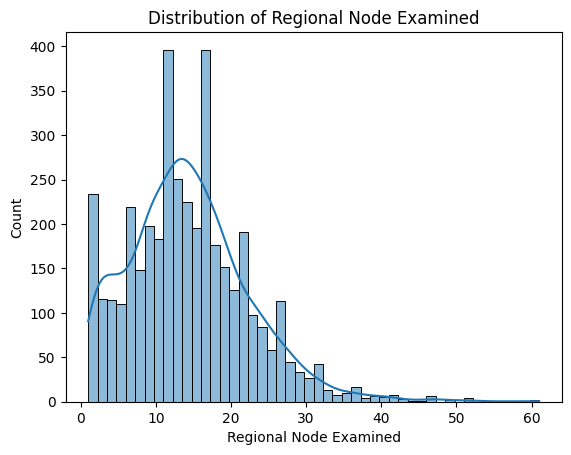

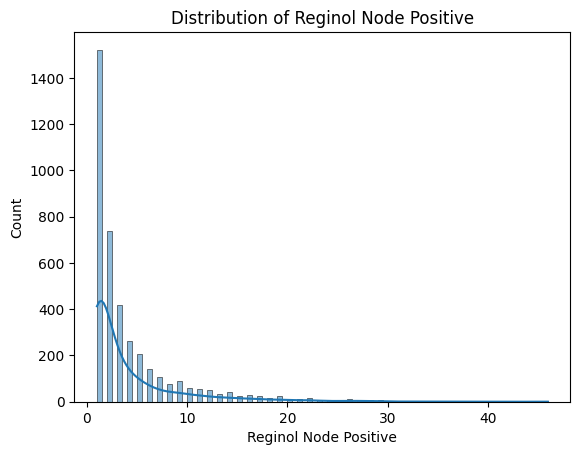

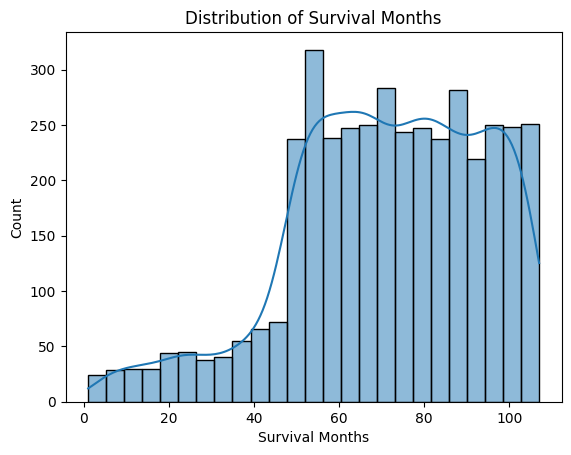

In [7]:
# Histograms for numerical columns to understand their distribution
for col in ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']:
    sns.histplot(bc_data[col], kde=True)  # kde=True adds a density curve
    plt.title(f"Distribution of {col}")
    plt.show()

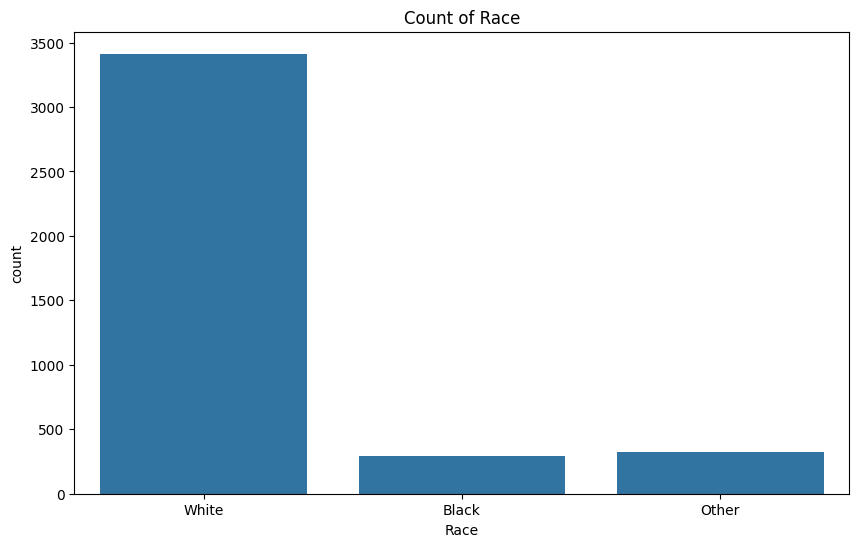

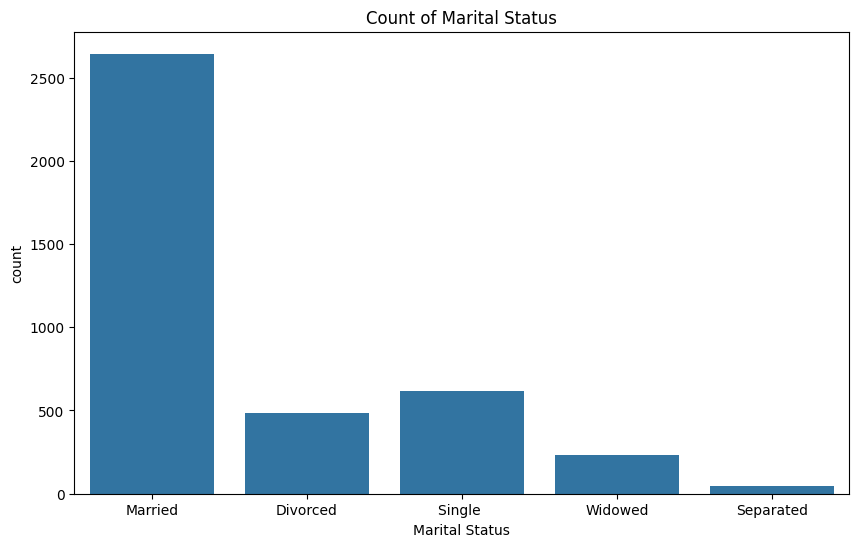

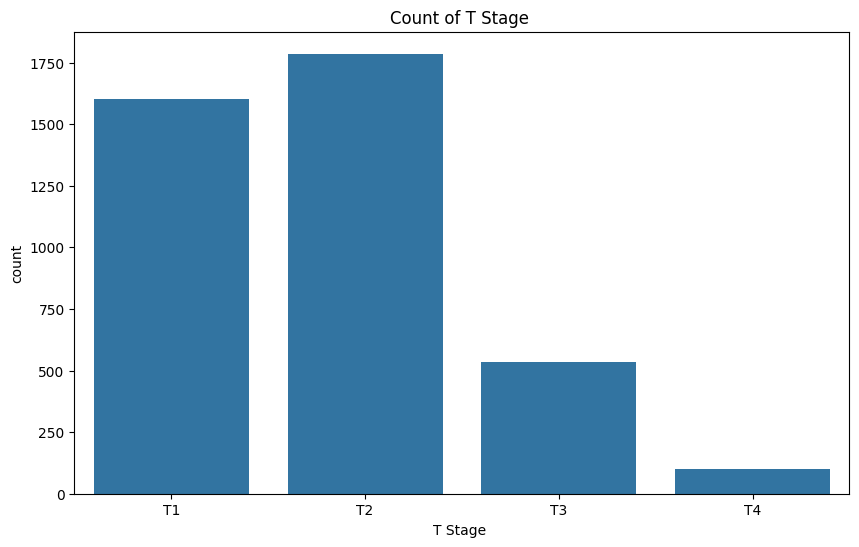

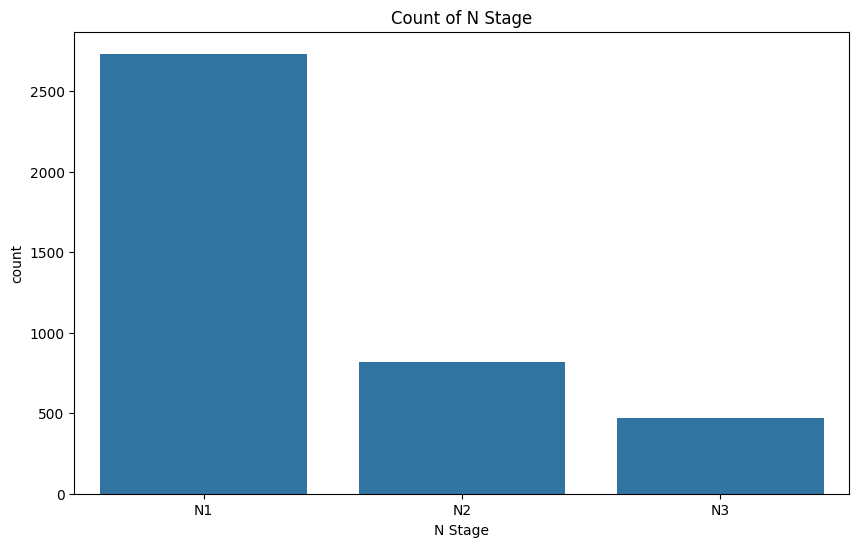

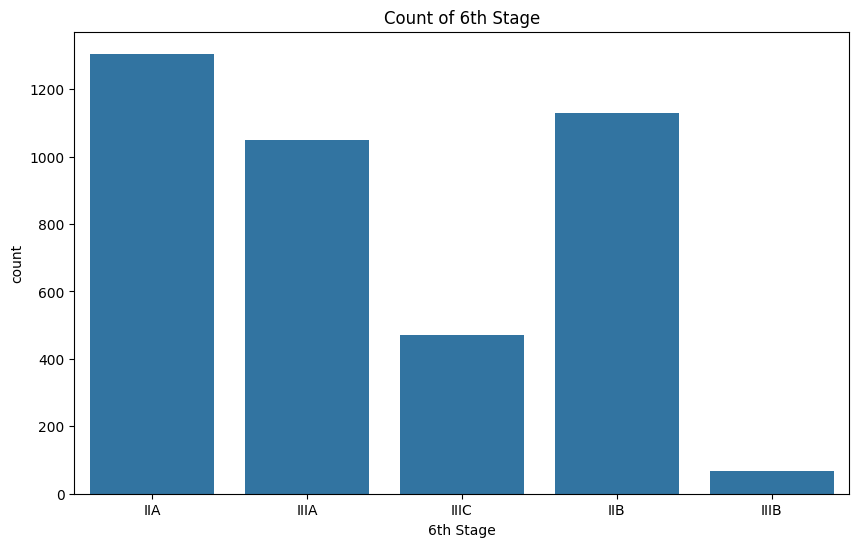

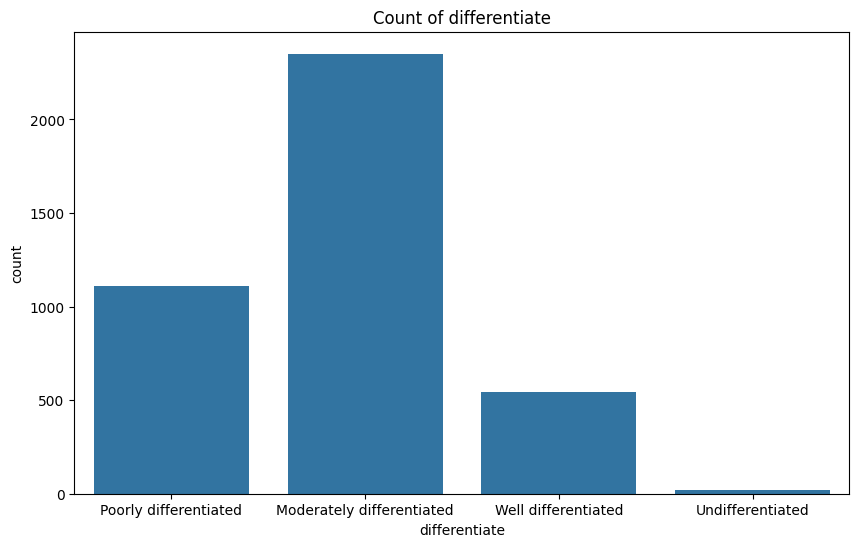

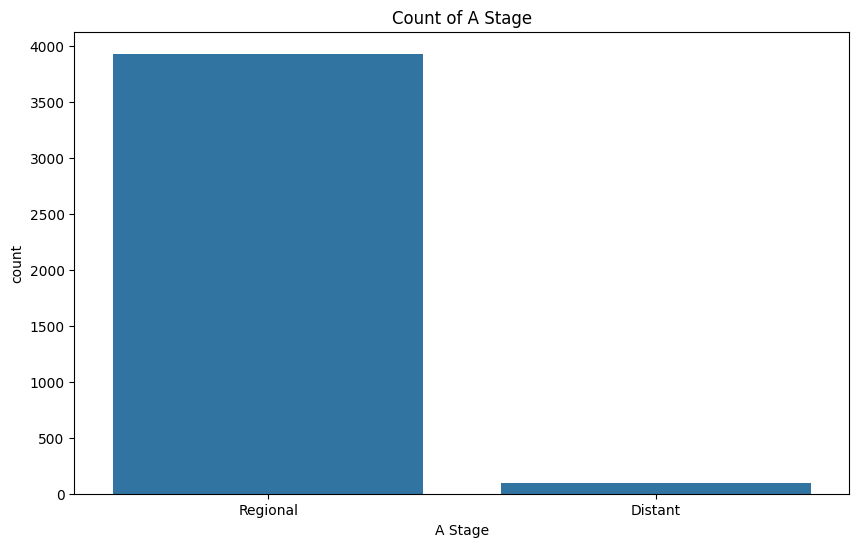

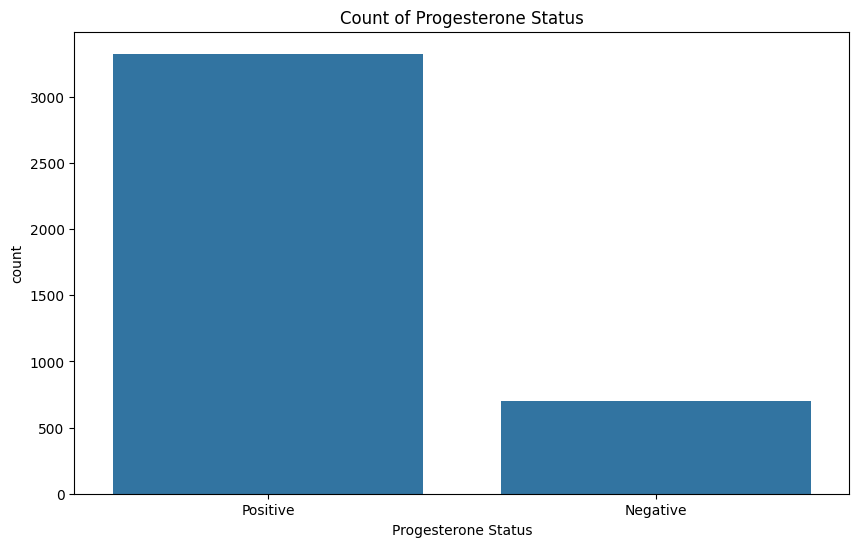

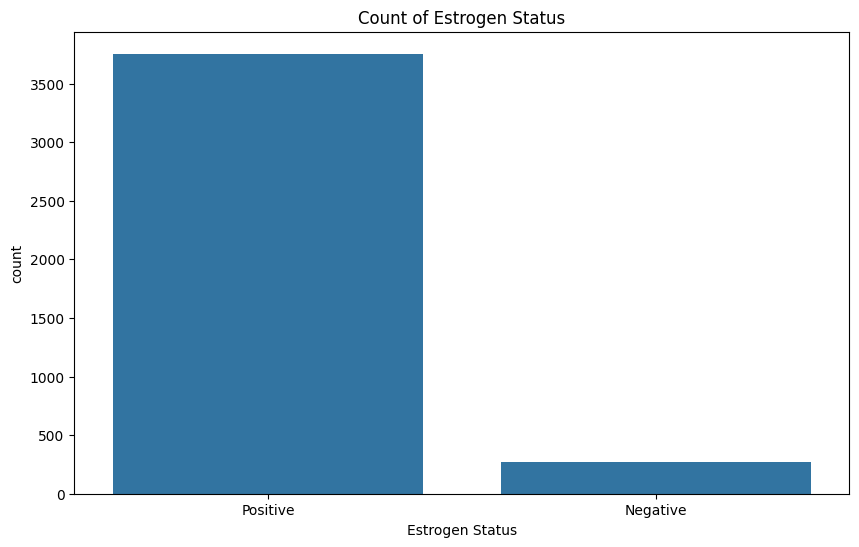

In [8]:
# Count plots for categorical columns to see their frequency distribution
for col in ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'A Stage', 'Progesterone Status', 'Estrogen Status']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=bc_data)
    plt.title(f"Count of {col}")
    plt.show()

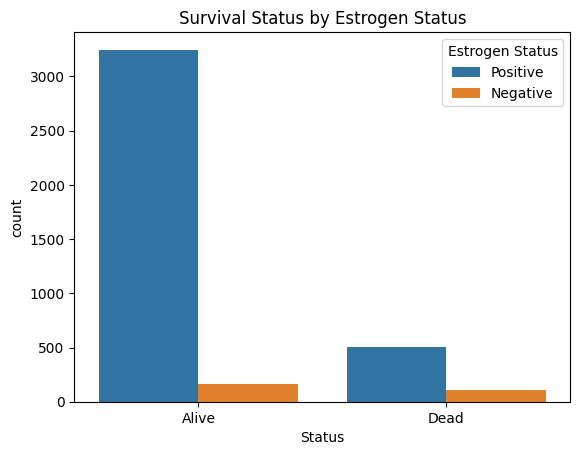

In [9]:
# Compare a categorical feature (er) across the target variable
sns.countplot(x='Status', hue='Estrogen Status', data=bc_data)
plt.title("Survival Status by Estrogen Status")
plt.show()

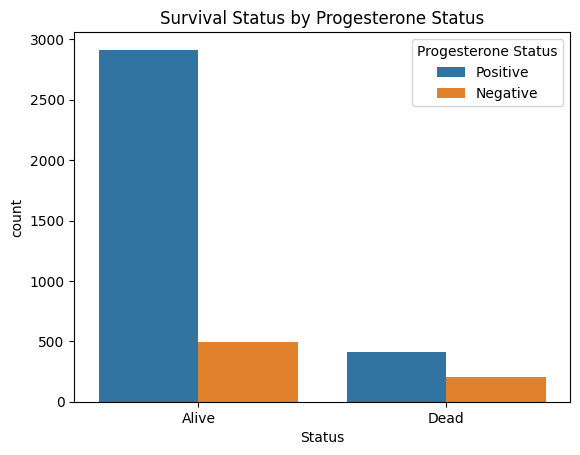

In [10]:
# Compare a categorical feature (er) across the target variable
sns.countplot(x='Status', hue='Progesterone Status', data=bc_data)
plt.title("Survival Status by Progesterone Status")
plt.show()

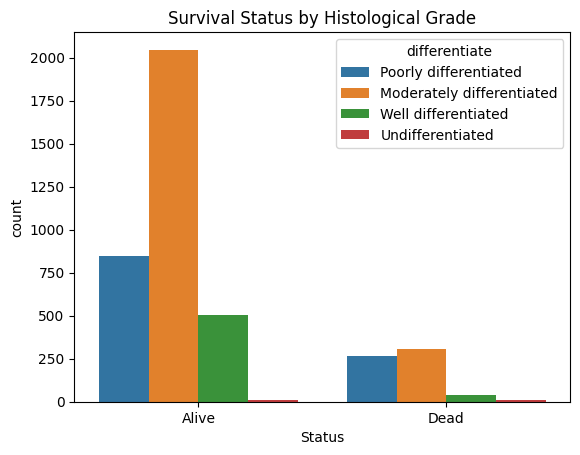

In [11]:
# Compare a categorical feature (er) across the target variable
sns.countplot(x='Status', hue='differentiate', data=bc_data)
plt.title("Survival Status by Histological Grade")
plt.show()

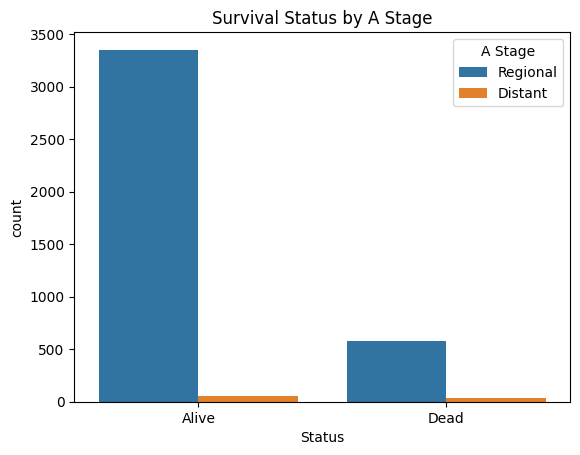

In [12]:
# Compare a categorical feature (er) across the target variable
sns.countplot(x='Status', hue='A Stage', data=bc_data)
plt.title("Survival Status by A Stage")
plt.show()

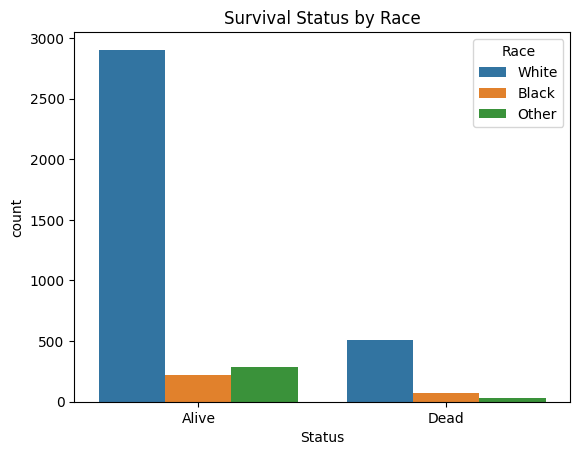

In [13]:
# Compare a categorical feature (er) across the target variable
sns.countplot(x='Status', hue='Race', data=bc_data)
plt.title("Survival Status by Race")
plt.show()

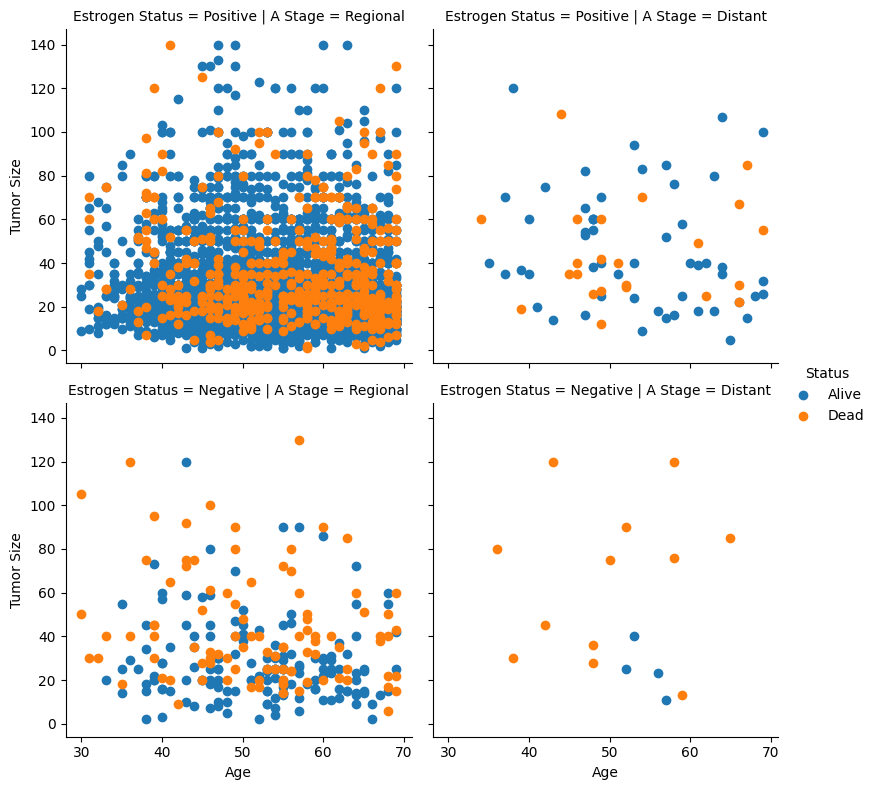

In [14]:
# Using FacetGrid to view relationships A Stage(Distant or Regional) and Estrogen Receptor Status
g = sns.FacetGrid(bc_data, col='A Stage', row='Estrogen Status', hue='Status', height=4, aspect=1)
g.map(plt.scatter, 'Age', 'Tumor Size')
g.add_legend()
plt.show()

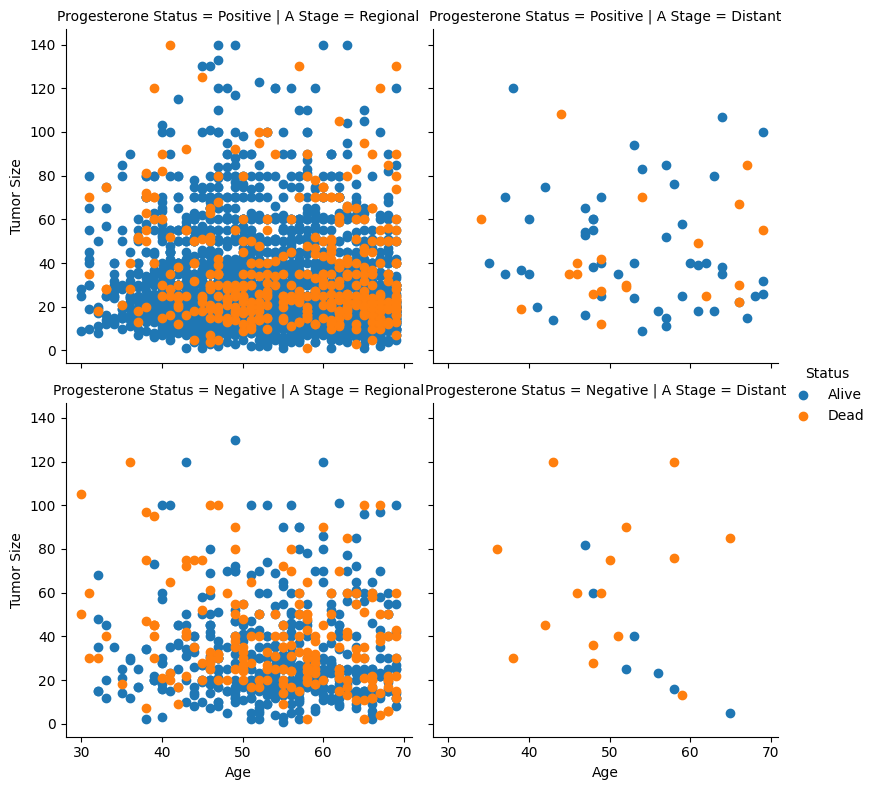

In [15]:
# Using FacetGrid to view relationships A Stage(Distant or Regional) and Progesterone Receptor Status
g = sns.FacetGrid(bc_data, col='A Stage', row='Progesterone Status', hue='Status', height=4, aspect=1)
g.map(plt.scatter, 'Age', 'Tumor Size')
g.add_legend()
plt.show()

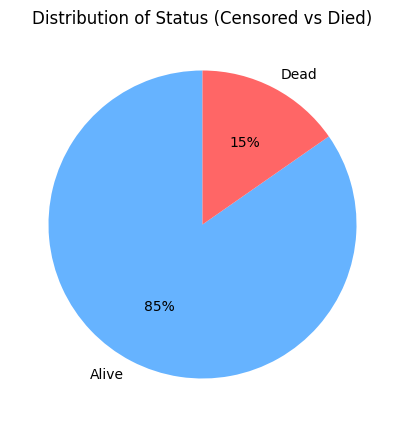

In [16]:
status_counts = bc_data['Status'].value_counts(normalize=True) * 100
status_counts

plt.figure(figsize=(5,5))
status_counts.plot.pie(autopct='%1.0f%%', colors=['#66b3ff', '#ff6666'], startangle=90, legend=False)
plt.title('Distribution of Status (Censored vs Died)')
plt.ylabel('')  # To hide the y-label (empty label)
plt.show()


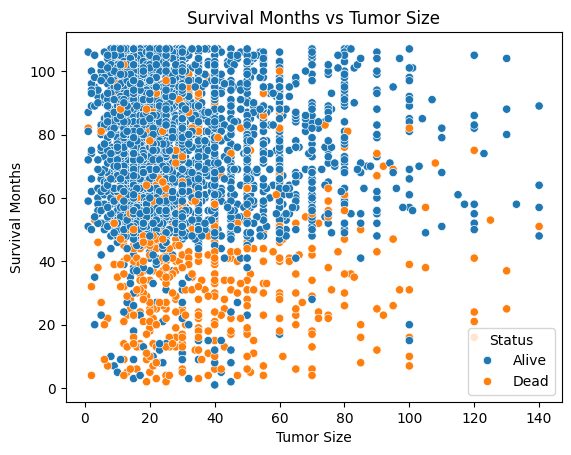

In [17]:
sns.scatterplot(x='Tumor Size', y='Survival Months', hue='Status', data=bc_data)
plt.title('Survival Months vs Tumor Size')
plt.show()

# **Feature Engineering - Data Processing**

In [18]:
for col in ['T Stage ', 'N Stage', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status', 'Status']:
    frequency_table = bc_data[col].value_counts()
    print(f"Frequency table for {col}:\n{frequency_table}\n")
    print('**'*20)

Frequency table for T Stage :
T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

****************************************
Frequency table for N Stage:
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

****************************************
Frequency table for 6th Stage:
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

****************************************
Frequency table for Grade:
Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

****************************************
Frequency table for Estrogen Status:
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

****************************************
Frequency table for Progesterone Status:
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

***************************************

In [19]:
bc_data.drop(['differentiate'], axis=1, inplace=True)

# Apply label encoding to 'variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
bc_data['6th Stage'] = label_encoder.fit_transform(bc_data['6th Stage'])
bc_data['Estrogen Status'] = label_encoder.fit_transform(bc_data['Estrogen Status'])
bc_data['Progesterone Status'] = label_encoder.fit_transform(bc_data['Progesterone Status'])
bc_data['Status'] = label_encoder.fit_transform(bc_data['Status'])

t_stage_mapping = {
    'T1': 1,
    'T2': 2,
    'T3': 3,
    'T4': 4}
bc_data['T Stage '] = bc_data['T Stage '].map(t_stage_mapping)

n_stage_mapping = {
    'N1': 1,
    'N2': 2,
    'N3': 3}
bc_data['N Stage'] = bc_data['N Stage'].map(n_stage_mapping)

grade_mapping = {
    '1': 1,  # Well differentiated
    '2': 2,  # Moderately differentiated
    '3': 3,  # Poorly differentiated
    ' anaplastic; Grade IV': 4  # Anaplastic (Grade IV)
    }
bc_data['Grade'] = bc_data['Grade'].map(grade_mapping)

In [20]:
for col in ['T Stage ', 'N Stage', '6th Stage', 'Grade', 'Estrogen Status', 'Progesterone Status', 'Status']:
    frequency_table = bc_data[col].value_counts()
    print(f"Frequency table for {col}:\n{frequency_table}\n")
    print('**'*20)

Frequency table for T Stage :
T Stage 
2    1786
1    1603
3     533
4     102
Name: count, dtype: int64

****************************************
Frequency table for N Stage:
N Stage
1    2732
2     820
3     472
Name: count, dtype: int64

****************************************
Frequency table for 6th Stage:
6th Stage
0    1305
1    1130
2    1050
4     472
3      67
Name: count, dtype: int64

****************************************
Frequency table for Grade:
Grade
2    2351
3    1111
1     543
4      19
Name: count, dtype: int64

****************************************
Frequency table for Estrogen Status:
Estrogen Status
1    3755
0     269
Name: count, dtype: int64

****************************************
Frequency table for Progesterone Status:
Progesterone Status
1    3326
0     698
Name: count, dtype: int64

****************************************
Frequency table for Status:
Status
0    3408
1     616
Name: count, dtype: int64

****************************************


In [21]:
# Applying one-hot encoding
race_dummies = pd.get_dummies(bc_data['Race'], prefix='Race', drop_first=True).astype(int)
bc_data = pd.concat([bc_data, race_dummies], axis=1)
bc_data.drop(columns=['Race'], inplace=True)

marital_status_dummies = pd.get_dummies(bc_data['Marital Status'], prefix='Marital', drop_first=True).astype(int)
bc_data = pd.concat([bc_data, marital_status_dummies], axis=1)
bc_data.drop(columns=['Marital Status'], inplace=True)

a_stage_dummies = pd.get_dummies(bc_data['A Stage'], prefix='A_Stage', drop_first=True).astype(int)
bc_data = pd.concat([bc_data, a_stage_dummies], axis=1)
bc_data.drop(columns=['A Stage'], inplace=True)

In [22]:
bc_data.head()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,A_Stage_Regional
0,68,1,1,0,3,4,1,1,24,1,60,0,0,1,1,0,0,0,1
1,50,2,2,2,2,35,1,1,14,5,62,0,0,1,1,0,0,0,1
2,58,3,3,4,2,63,1,1,14,7,75,0,0,1,0,0,0,0,1
3,58,1,1,0,3,18,1,1,2,1,84,0,0,1,1,0,0,0,1
4,47,2,1,1,3,41,1,1,3,1,50,0,0,1,1,0,0,0,1


# **Correlation Analysis**

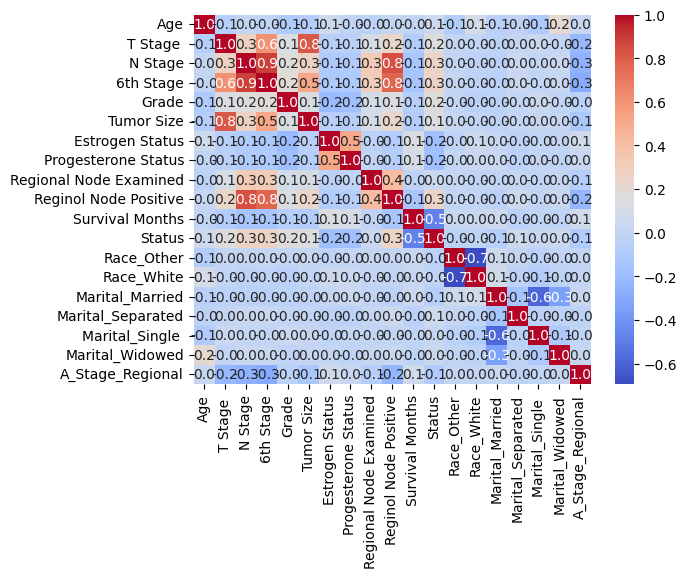

In [23]:
sns.heatmap(bc_data.corr(), annot=True, fmt='.1f', cmap="coolwarm")
plt.show()

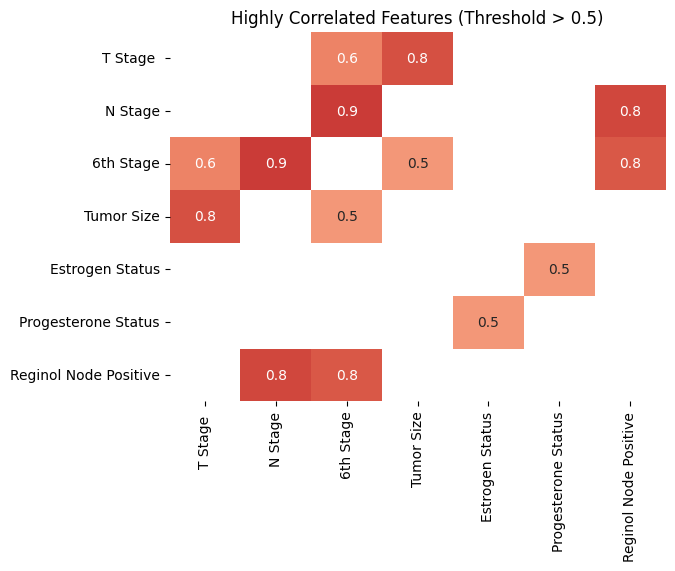

In [24]:
correlation_matrix = bc_data.corr()
threshold = 0.5

high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1)]

filtered_corr_matrix = high_corr.dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(filtered_corr_matrix, annot=True, fmt='.1f', cmap="coolwarm", cbar=False, vmin=-1, vmax=1)
plt.title("Highly Correlated Features (Threshold > 0.5)")
plt.show()

# **Predict survival status**

In [25]:
#Standardize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bc_data[['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']] = scaler.fit_transform(
    bc_data[['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']])

In [26]:
bc_data.head()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital_Married,Marital_Separated,Marital_Single,Marital_Widowed,A_Stage_Regional
0,0.974359,0.000000,0.0,0.00,0.666667,0.021583,1.0,1.0,0.383333,0.000000,0.556604,0.0,0,1,1,0,0,0,1
1,0.512821,0.333333,0.5,0.50,0.333333,0.244604,1.0,1.0,0.216667,0.088889,0.575472,0.0,0,1,1,0,0,0,1
2,0.717949,0.666667,1.0,1.00,0.333333,0.446043,1.0,1.0,0.216667,0.133333,0.698113,0.0,0,1,0,0,0,0,1
3,0.717949,0.000000,0.0,0.00,0.666667,0.122302,1.0,1.0,0.016667,0.000000,0.783019,0.0,0,1,1,0,0,0,1
4,0.435897,0.333333,0.0,0.25,0.666667,0.287770,1.0,1.0,0.033333,0.000000,0.462264,0.0,0,1,1,0,0,0,1


Accuracy:81
Recall:82
Precision:41
F1:55
Confusion Matrix:
[[830 203]
 [ 32 143]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88      1033
         1.0       0.41      0.82      0.55       175

    accuracy                           0.81      1208
   macro avg       0.69      0.81      0.71      1208
weighted avg       0.88      0.81      0.83      1208

AUC: 0.81


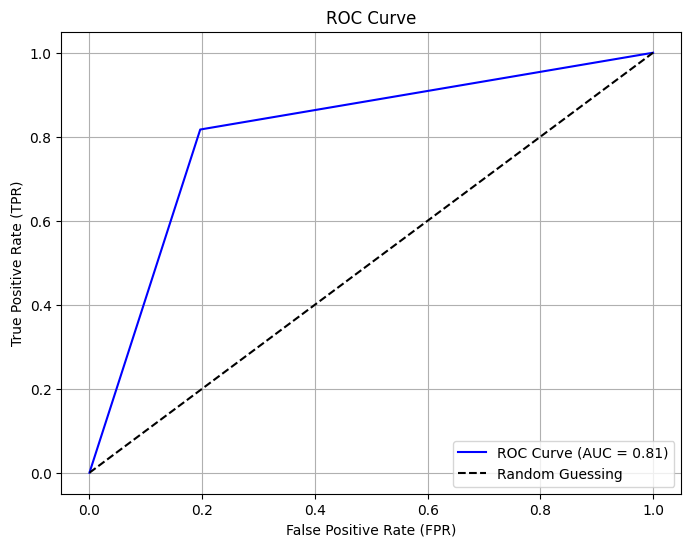

,Feature,Importance,Absolute_Importance
10,Survival Months,-5.344867,5.344867
9,Reginol Node Positive,2.572094,2.572094
8,Regional Node Examined,-1.778636,1.778636
4,Grade,1.422069,1.422069
1,T Stage,1.329501,1.329501
0,Age,0.944772,0.944772
5,Tumor Size,-0.885482,0.885482
2,N Stage,0.580074,0.580074
14,Marital_Separated,0.528721,0.528721
6,Estrogen Status,-0.478783,0.478783


In [27]:
# To predict Stastus using Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report, roc_curve, roc_auc_score

# Data Splitting into features and target variable
# X = bc_data[['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'Tumor Size', 'Estrogen Status', 'Progesterone Status','Regional Node Examined', 'Reginol Node Positive', 'Survival Months']]
X = bc_data.drop(columns=['Status'])
y = bc_data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label= 1)
precision = precision_score(y_test, y_pred, pos_label= 1)
f1 = f1_score(y_test, y_pred, pos_label= 1)
class_report = classification_report(y_test, y_pred)

print('Accuracy:{}'.format(round(accuracy*100),2))
print('Recall:{}'.format(round(recall*100),2))
print('Precision:{}'.format(round(precision*100),2))
print('F1:{}'.format(round(f1*100),2))
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

coefficients = model.coef_[0]  # Coefficients of the logistic regression model
feature_names = X.columns
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort features by their absolute importance
feature_importance['Absolute_Importance'] = np.abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='Absolute_Importance', ascending=False)
feature_importance

#Evaluate = ({'Actual': y_test, 'Predicted': y_pred})
#Evaluate = pd.DataFrame(Evaluate)
#Evaluate

In [28]:
Evaluate = ({'Actual': y_test, 'Predicted': y_pred})
Evaluate = pd.DataFrame(Evaluate)
Evaluate

,Actual,Predicted
1718,0.0,0.0
1204,0.0,0.0
2722,0.0,0.0
1937,1.0,1.0
1226,0.0,0.0
...,...,...
187,0.0,0.0
1829,1.0,1.0
3318,0.0,1.0
3803,0.0,1.0




*   The model correctly classified 81% of the data points overall.
*   A precision of 41% indicates that only 41% of the predicted positive cases (class 1) are actual positives.
*   Recall(82%): The model correctly identified 82% of the actual positive cases.
*   The F1-score for class 1.0 is 55%, indicating moderate performance in predicting the minority class.
*   An AUC of 0.81 indicates good discriminatory power.

**Performance on Class 0.0 (Majority Class):**
The model performs very well for class 0.0, with a precision of 92%, recall of 98%, and an F1-score of 95%. This is expected, given the class imbalance and the larger size of this class.

**Performance on Class 1.0 (Minority Class):**
The model has a harder time with the minority class, achieving only 50% recall. While 80% of the predicted positives are correct, it fails to identify half of the actual positives, which limits its effectiveness for class 1.0.

Insights from the Results
1.   The model achieves good overall accuracy (81%) and discriminatory ability (AUC: 0.81), suggesting it performs well on the majority class but could improve on the minority class.
2. The model prioritizes identifying as many positives as possible (high recall) at the cost of making more false-positive predictions (low precision).


**Confusion Matrix**

True Positive (830): Class 0 correctly predicted as class 0.

False Positives (203): Class 1 incorrectly predicted as class 0.

False Negatives (32): Class 0 incorrectly predicted as class 1.

True Negative (143): Class 1 correctly predicted as class 1.



Accuracy:91
Recall:50
Precision:80
F1:62
Confusion Matrix:
[[1011   22]
 [  87   88]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1033
         1.0       0.80      0.50      0.62       175

    accuracy                           0.91      1208
   macro avg       0.86      0.74      0.78      1208
weighted avg       0.90      0.91      0.90      1208



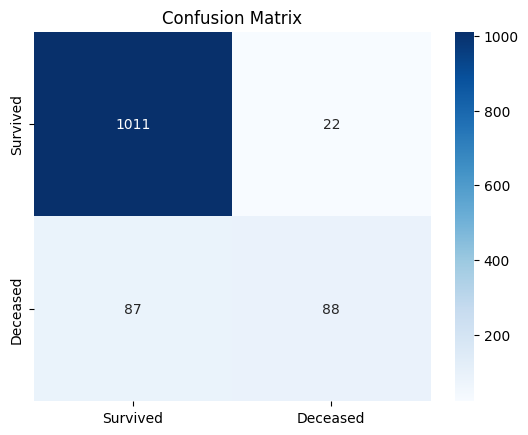

AUC: 0.74


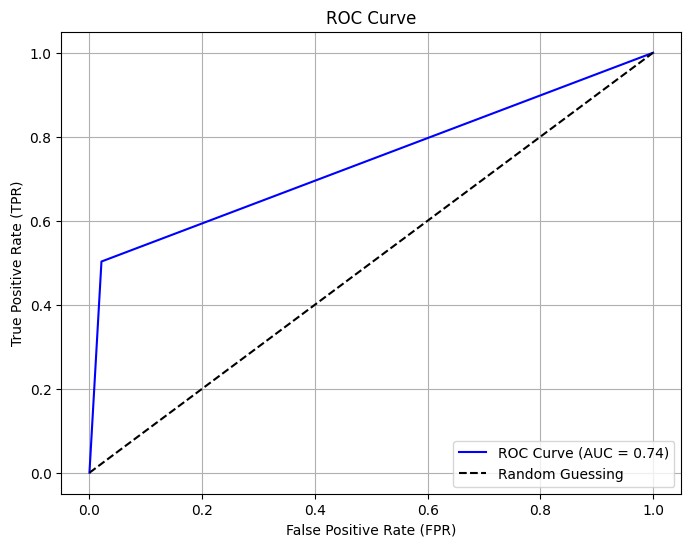

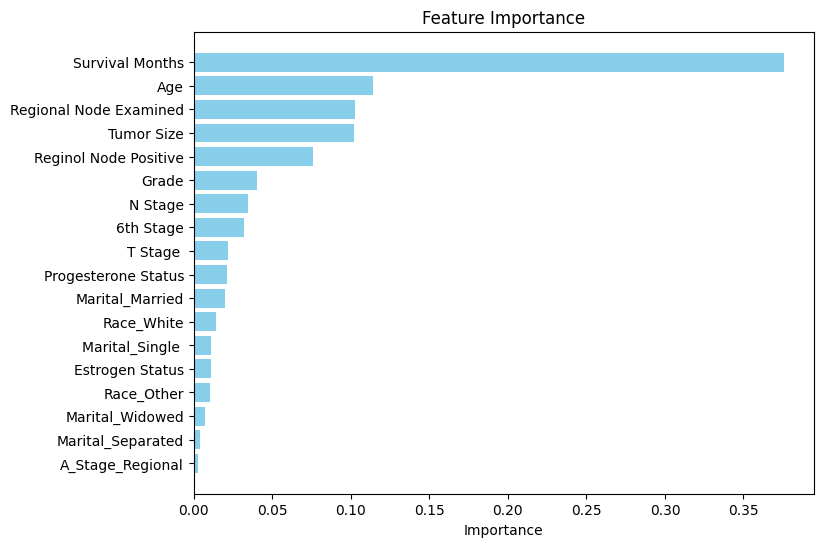

In [29]:
# To predict Status using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Data Splitting into features and target variable
X = bc_data.drop(columns=['Status'])
y = bc_data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training (Random Forest Classifier)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
class_report = classification_report(y_test, y_pred)

print('Accuracy:{}'.format(round(accuracy*100),2))
print('Recall:{}'.format(round(recall*100),2))
print('Precision:{}'.format(round(precision*100),2))
print('F1:{}'.format(round(f1*100),2))
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Survived", "Deceased"], yticklabels=["Survived", "Deceased"])
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# To check which features contribute the most to predicting of STATUS
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()




*   The model correctly predicted 91% of all cases.
*   The model identified 50% of positive cases, meaning it missed half of them.
*   Among the predicted positive cases, 80% were correct.
*   The moderate F1-score indicates that while the model is precise, its recall for the minority class is limited.
*   An AUC of 0.74 indicates moderate discriminatory ability


**Confusion Matrix**

True Positive (TN): 1011 cases correctly classified as 0.0.

False Positives (FP): 22 cases incorrectly classified as 0.0.

False Negatives (FN): 87 cases incorrectly classified as 1.0.

True Negative (TP): 88 cases correctly classified as 1.0.


**Performance on Class 0.0 (Majority Class- Alive):**
The model performs very well for class 0.0, with a precision of 92%, recall of 98%, and an F1-score of 95%. This is expected, given the class imbalance and the larger size of this class.


**Performance on Class 1.0 (Minority Class- Died):**
The model has a harder time with the minority class, achieving only 50% recall. While 80% of the predicted positives are correct, it fails to identify half of the actual positives, which limits its effectiveness for class 1.0.



Accuracy:89
Recall:53
Precision:67
F1:59
Confusion Matrix:
[[1011   22]
 [  87   88]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1033
         1.0       0.80      0.50      0.62       175

    accuracy                           0.91      1208
   macro avg       0.86      0.74      0.78      1208
weighted avg       0.90      0.91      0.90      1208

AUC: 0.83


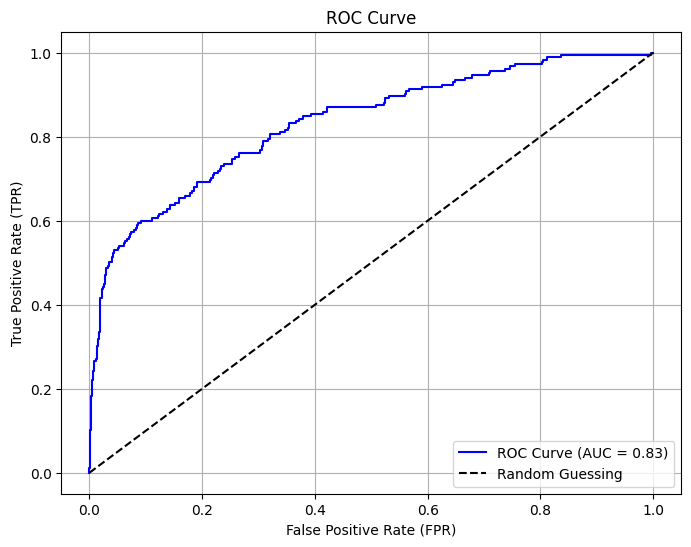

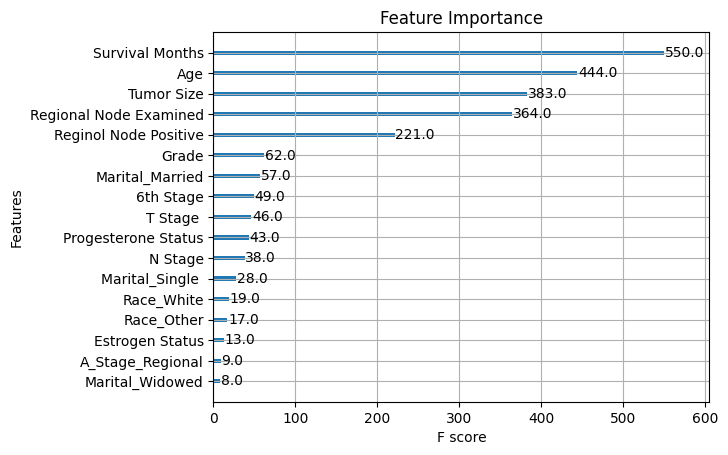

In [30]:
import xgboost as xgb
from xgboost import XGBClassifier

# Data Splitting into features and target variable
X = bc_data.drop(columns=['Status'])
y = bc_data['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:{}'.format(round(accuracy*100),2))
print('Recall:{}'.format(round(recall*100),2))
print('Precision:{}'.format(round(precision*100),2))
print('F1:{}'.format(round(f1*100),2))
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

*   The model correctly predicted 89% of all cases.
*   Recall: The model identified 53% of the actual positive cases
*   Precision: Among the predicted positive cases, 67% were correct.
*   The F1-score of 59% reflects a moderate trade-off between precision and recall for the minority class.
*   An AUC of 0.83 indicates good discriminatory power, better than Random Forest (AUC: 0.74) and comparable to Logistic Regression (AUC: 0.81). AUC values indicate better model performance beacuse the relatively high AUC indicates that the model is capable of distinguishing between classes effectively.
*   ROC Curve: The closer the curve is to the top-left corner, the better the model.


True Positive (TN): 1011 cases correctly classified as 0.0.

False Positives (FP): 22 cases incorrectly classified as 0.0.

False Negatives (FN): 87 cases incorrectly classified as 1.0.

True Negative (TP): 88 cases correctly classified as 1.0.

**Performance on Class 0.0 (Majority Class):**
Precision: 92%, Recall: 98%, F1-score: 95% — Excellent performance for the majority class, as expected.

**Performance on Class 1.0 (Minority Class):**
Recall (53%) is moderate, indicating that nearly half of the actual positives are missed.
Precision (67%) shows that a significant portion of predicted positives are correct.

**Comparison with Other Models:**

XGBoost shows strong performance with a balance between precision, recall, and AUC, making it a versatile choice.


# **Predict survival months**

In [31]:
bc_data.columns

Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'Tumor Size',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Race_Other',
       'Race_White', 'Marital_Married', 'Marital_Separated', 'Marital_Single ',
       'Marital_Widowed', 'A_Stage_Regional'],
      dtype='object')

Mean Squared Error: 0.04
Root Mean Squared Error: 0.19
Mean Absolute Error: 0.16
R-squared: 0.25


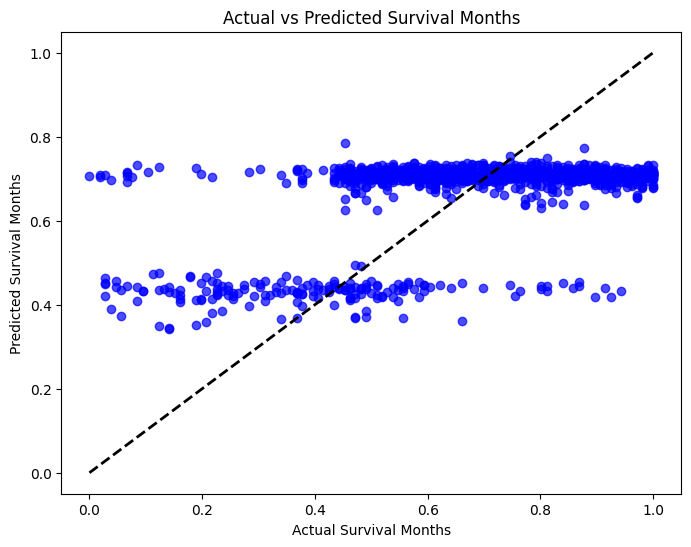

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = bc_data.drop(columns=['Survival Months'])
y = bc_data['Survival Months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Survival Months")
plt.ylabel("Predicted Survival Months")
plt.title("Actual vs Predicted Survival Months")
plt.show()


### **Summary Report of Model Performances**

This report compares the performance of **Linear Regression**, **XGBoost Regressor**, **Random Forest Regressor**, and the **Tuned Model** based on evaluation metrics for predicting survival months.

---

#### **Key Metrics**
| **Model**               | **Mean Absolute Error (MAE)** | **Mean Squared Error (MSE)** | **Root Mean Squared Error (RMSE)** | **R-squared (R²)** |
|--------------------------|-------------------------------|------------------------------|------------------------------------|---------------------|
| Linear Regression        | 0.16                         | 0.04                         | 0.19                              | 0.25                |
| XGBoost Regressor        | 0.16                         | 0.0366                       | 0.19                              | 0.21                |
| Random Forest Regressor  | 0.16                         | 0.04                         | 0.20                              | 0.18                |
| Tuned Model              | **0.155**                    | **0.0356**                   | **0.189**                         | **0.25**            |

---

#### **Analysis**
1. **Linear Regression**:
   - Performed reasonably well with an **R² of 0.25**, explaining 25% of the variance.
   - Errors (MAE: 0.16, RMSE: 0.19) indicate decent predictive accuracy.

2. **XGBoost Regressor**:
   - Delivered slightly better error metrics than Random Forest (MSE: 0.0366 vs. 0.04).
   - However, its **R² of 0.21** suggests it captures less variability compared to Linear Regression.

3. **Random Forest Regressor**:
   - Had the largest RMSE (0.20) and the lowest R² (0.18), indicating it struggled to explain variability in the target variable.
   - Errors (MAE: 0.16) were on par with other models.

4. **Tuned Model**:
   - Showed **the best overall performance**:
     - Smallest errors: **MAE: 0.155**, **MSE: 0.0356**, **RMSE: 0.189**.
     - Equaled Linear Regression in R² (**0.25**), explaining the same proportion of variance while delivering smaller errors.
   - Indicates effective improvement through hyperparameter tuning.

---

#### **Key Takeaways**
- **Prediction Accuracy**: All models demonstrated similar error metrics (MAE and RMSE around 0.16–0.20), showing decent but not perfect accuracy in predicting survival months.
- **Explained Variance**: The **Tuned Model** and **Linear Regression** both achieved an **R² of 0.25**, outperforming the other models. However, none of the models explained more than 25% of the variance, suggesting missing data patterns or influential features.


---

### **Conclusion**
The **Tuned Model** outperformed other models in error metrics and tied with Linear Regression for the best R² score. However, the low R² across all models highlights the need for further refinements in features or data to improve performance.


Scatter Plot: Points aligning along the diagonal line suggest better predictions.

                   Feature  Coefficient
1                 T Stage      0.079565
17        A_Stage_Regional     0.059636
9    Reginol Node Positive     0.028738
11              Race_Other     0.025881
2                  N Stage     0.015843
0                      Age     0.015774
6          Estrogen Status     0.015055
4                    Grade     0.013107
12              Race_White     0.012671
7      Progesterone Status     0.003155
8   Regional Node Examined     0.000296
14       Marital_Separated    -0.010283
13         Marital_Married    -0.013638
15         Marital_Single     -0.020271
16         Marital_Widowed    -0.030028
3                6th Stage    -0.036221
5               Tumor Size    -0.120675
10                  Status    -0.270829


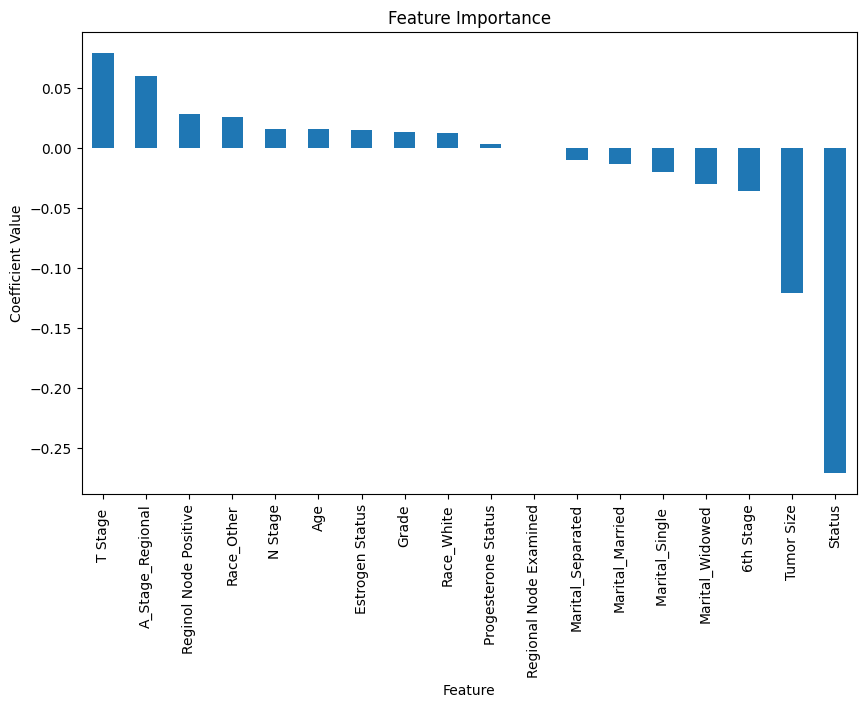

In [33]:
# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_reg.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

# Plot feature importance
coefficients.plot(kind='bar', x='Feature', y='Coefficient', figsize=(10, 6), legend=False)
plt.title("Feature Importance")
plt.ylabel("Coefficient Value")
plt.show()


The coefficients represent the relationship between each feature and the target variable, with positive values increasing the predicted outcome and negative values decreasing it. The magnitude of the coefficient tells you how much influence the feature has on the prediction.

Shows which features influence the target most significantly.

Mean Squared Error: 0.04
Root Mean Squared Error: 0.19
Mean Absolute Error: 0.16
R-squared: 0.21


<ipython-input-34-7d17a8053695>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


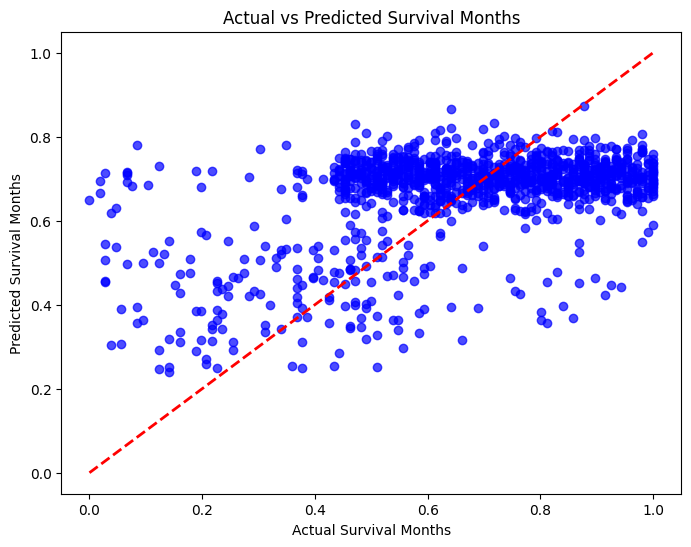

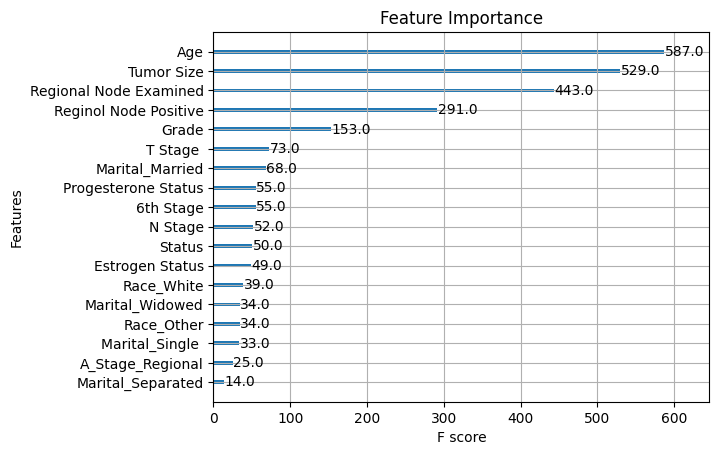

In [34]:
from xgboost import XGBRegressor

X = bc_data.drop(['Survival Months'], axis=1)
y = bc_data['Survival Months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel("Actual Survival Months")
plt.ylabel("Predicted Survival Months")
plt.title("Actual vs Predicted Survival Months")
plt.show()

xgb.plot_importance(xgb_regressor, importance_type='weight')
plt.title('Feature Importance')
plt.show()



**Errors (MSE, RMSE, MAE):**
The errors are relatively small, suggesting the predictions are close to the actual survival times. However, these metrics alone don’t indicate if the model is effective—just that its predictions aren't wildly off.

**R-squared (R²):**
The low R² indicates that the model explains only a small fraction of the variability in survival months. Most of the variance is still unaccounted for, suggesting the model’s performance can be improved. An R² of 0.21 means that the model explains 21% of the variability in survival months, leaving 79% unexplained.
This suggests that while the model captures some patterns, it misses many factors influencing survival months.



Mean Squared Error: 0.04
Root Mean Squared Error: 0.20
Mean Absolute Error: 0.16
R-squared: 0.18


<ipython-input-35-f35978a93772>:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")


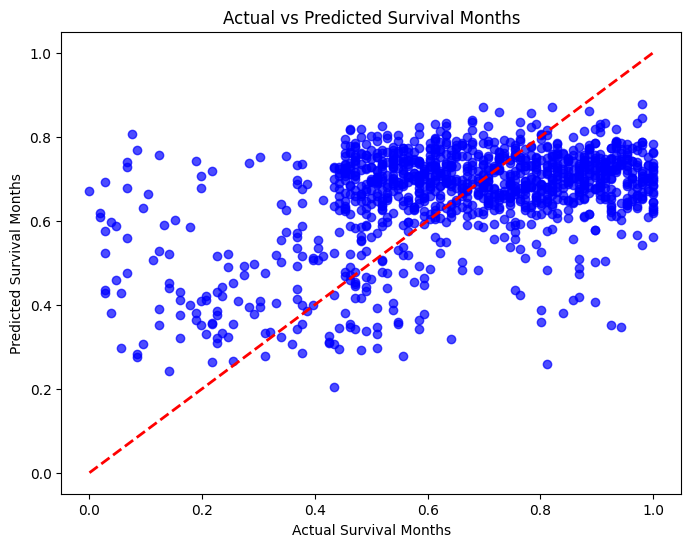


Feature Importance:
Tumor Size: 0.1797
Age: 0.1874
Regional Node Examined: 0.1806
Reginol Node Positive: 0.0912
Grade: 0.0472
T Stage : 0.0137
Marital_Married: 0.0280
Progesterone Status: 0.0240
6th Stage: 0.0226
N Stage: 0.0111
Status: 0.2145


In [35]:
from sklearn.ensemble import RandomForestRegressor

# Features and target variable
X = bc_data[['Tumor Size', 'Age', 'Regional Node Examined', 'Reginol Node Positive', 'Grade', 'T Stage ', 'Marital_Married', 'Progesterone Status','6th Stage', 'N Stage', 'Status']]
y = bc_data['Survival Months']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.xlabel("Actual Survival Months")
plt.ylabel("Predicted Survival Months")
plt.title("Actual vs Predicted Survival Months")
plt.show()

# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

# Display feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")


In [36]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate with best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation with Tuned Hyperparameters:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Model Evaluation with Tuned Hyperparameters:
Mean Absolute Error: 0.15499437697491225
Mean Squared Error: 0.03564796885779196
Root Mean Squared Error: 0.18880669706817063
R-squared: 0.2494610232856419


# **Survival Analysis**

In [37]:
!pip install lifelines
from lifelines import CoxPHFitter

# Create a Cox proportional hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(bc_data, duration_col='Survival Months', event_col='Status')

# Summary of the Cox model
cph.print_summary()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=265d857f0aef9ff7809aabdf257efef5f93a57a9c1a7c01193abfe9aeb85311b
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


<lifelines.CoxPHFitter: fitted with 4024 total observations, 3408 right-censored observations>
             duration col = 'Survival Months'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 4024
number of events observed = 616
   partial log-likelihood = -4672.43
         time fit was run = 2025-01-06 10:35:01 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
Age                     0.79      2.21      0.19            0.42            1.17                1.53                3.21
T Stage                 0.85      2.34      0.28            0.30            1.39                1.35                4.03
N Stage                 0.70      2.00      0.31            0.09            1.30                1.09                3.69
6th Stage              -0.02      0.98      0.40           -0.80            0.77                0.45                2.16
Grade                   1.18      3.26      0.21            0.78            1.59                2.18                4.88
Tumor Size             -0.03      0.97      0.37           -0.76            0.70                0.47                2.01
Estrogen Status        -0.65      0.52      0.13           -0.92           -0.39                0.40                0.68
Progesterone Status    -0.47      0.62      0.11           -0.68           -0.26                0.51                0.77
Regional Node Examined -1.94      0.14      0.39           -2.70           -1.18                0.07                0.31
Reginol Node Positive   2.41     11.11      0.49            1.44            3.38                4.22               29.28
Race_Other             -0.74      0.48      0.21           -1.16           -0.32                0.31                0.73
Race_White             -0.37      0.69      0.13           -0.63           -0.12                0.53                0.89
Marital_Married        -0.20      0.82      0.12           -0.43            0.03                0.65                1.03
Marital_Separated       0.44      1.55      0.29           -0.13            1.00                0.88                2.73
Marital_Single         -0.01      0.99      0.15           -0.30            0.27                0.74                1.32
Marital_Widowed        -0.04      0.96      0.18           -0.39            0.32                0.68                1.37
A_Stage_Regional       -0.12      0.89      0.19           -0.49            0.24                0.61                1.27

                        cmp to     z      p  -log2(p)
covariate                                            
Age                       0.00  4.19 <0.005     15.14
T Stage                   0.00  3.05 <0.005      8.76
N Stage                   0.00  2.24   0.03      5.30
6th Stage                 0.00 -0.04   0.97      0.04
Grade                     0.00  5.76 <0.005     26.82
Tumor Size                0.00 -0.09   0.93      0.11
Estrogen Status           0.00 -4.85 <0.005     19.64
Progesterone Status       0.00 -4.42 <0.005     16.60
Regional Node Examined    0.00 -5.03 <0.005     20.97
Reginol Node Positive     0.00  4.87 <0.005     19.78
Race_Other                0.00 -3.45 <0.005     10.81
Race_White                0.00 -2.89 <0.005      8.04
Marital_Married           0.00 -1.67   0.09      3.41
Marital_Separated         0.00  1.52   0.13      2.97
Marital_Single            0.00 -0.08   0.94      0.09
Marital_Widowed           0.00 -0.21   0.83      0.26
A_Stage_Regional          0.00 -0.66   0.51      0.96
---
Concordance = 0.74
Partial AIC = 9378.86
log-likelihood ratio test = 493.08 on 17 df
-log2(p) of ll-ratio test = 309.82

This Cox proportional hazards model provides a statistical analysis of the relationship between various covariates and the survival times of individuals in the study. Here’s a breakdown for reporting purposes:

---

### **Model Summary**
- **Model Type**: Cox Proportional Hazards (CoxPHFitter)
- **Duration Column**: `'Survival Months'` (time until the event or censoring)
- **Event Column**: `'Status'` (indicating whether the event occurred)
- **Baseline Estimation**: Breslow
- **Number of Observations**: 4024
- **Number of Events Observed**: 616
- **Concordance Index**: 0.74 (measure of the model's predictive accuracy; 1 is perfect, 0.5 is random)
- **Partial AIC**: 9378.86 (smaller values indicate a better-fitting model)
- **Partial Log-Likelihood**: -4672.43
- **Log-Likelihood Ratio Test**: 493.08 (on 17 degrees of freedom, significant with -log2(p) = 309.82)

---

### **Key Covariate Analysis**
For each covariate, the coefficients (( beta )) and their exponential forms (({exp}(\beta) \)) indicate the impact on the hazard (risk of the event).

- **\( beta )**: Positive values indicate increased risk, negative values suggest decreased risk.
- **\( {exp}(beta) )**: Represents the multiplicative effect on the hazard. Values > 1 increase risk; < 1 reduce risk.
- **95% Confidence Interval (CI)**: Indicates the range in which the true effect likely falls.

---

### **Significant Predictors (p < 0.05)**

1. **Age**:
   - \( beta = 0.79 ), \({exp}(beta) = 2.21): Older age increases the hazard by 121%.
   - Highly significant (( p < 0.005 )).

2. **T Stage**:
   - \( beta = 0.85 ), \({exp}(beta) = 2.34 ): Higher T stage significantly increases risk.
   - Significant (( p < 0.005 )).

3. **N Stage**:
   - \( beta = 0.70 ), \( {exp}(beta) = 2.00 ): Positive lymph node status doubles the risk.
   - Significant (\( p = 0.03 \)).

4. **Grade**:
   - \( beta = 1.18 ), \( {exp}(beta) = 3.26 ): Higher grade triples the hazard.
   - Highly significant (\( p < 0.005 )).

5. **Estrogen Status**:
   - \( beta = -0.65 ), \( {exp}(beta) = 0.52 ): Positive estrogen receptor status reduces risk by 48%.
   - Highly significant (( p < 0.005 )).

6. **Progesterone Status**:
   - \( beta = -0.47 ), \( {exp}(beta) = 0.62 ): Positive progesterone receptor status reduces risk by 38%.
   - Highly significant (( p < 0.005 )).

7. **Regional Node Examined**:
   - \( beta = -1.94 ), \( {exp}(beta) = 0.14 ): More examined nodes reduce risk significantly.
   - Highly significant (( p < 0.005 )).

8. **Regional Node Positive**:
   - \( beta = 2.41 ), \( {exp}(beta) = 11.11 ): Each positive node dramatically increases risk.
   - Highly significant (( p < 0.005 )).

9. **Race (Other)**:
   - \( beta = -0.74 ), \( {exp}(beta) = 0.48 ): Reduced risk compared to baseline race.
   - Significant (( p < 0.005 )).

10. **Race (White)**:
    - (beta = -0.37), ({exp}(beta) = 0.69): Reduced risk compared to baseline race.
    - Significant (( p < 0.005 )).


### **Non-Significant Predictors (p ≥ 0.05)**
- **6th Stage, Tumor Size, Marital Status Categories (Separated, Single, Widowed)**, and **A Stage** do not show significant associations with survival.



### **Conclusion**
This model highlights the significant role of tumor characteristics (e.g., stage, grade), hormonal status, nodal involvement, and certain demographic factors in predicting survival outcomes. These results can guide further clinical decision-making and research.





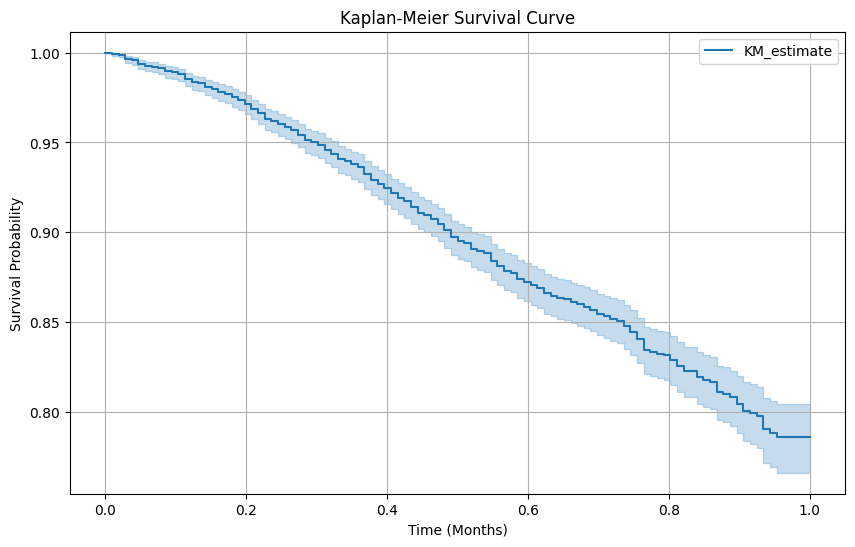

In [38]:
# Survival Analysis with Kaplan-Meier curves
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Prepare data
time = bc_data['Survival Months']
status = bc_data['Status']

# Fit Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(time, event_observed=status)

# Plot survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


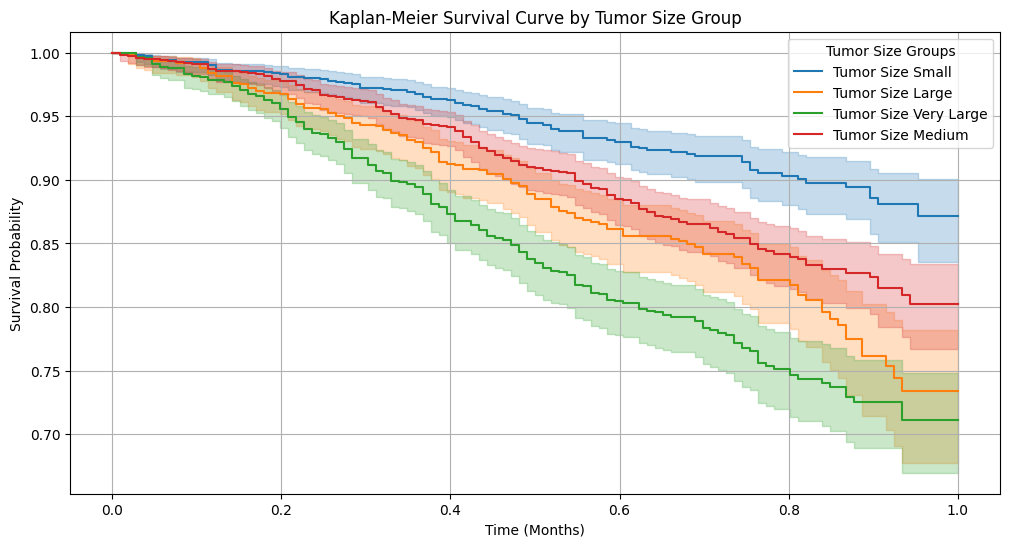

In [39]:
# Creating tumor size groups (quartiles)
bc_data['tumor_size_group'] = pd.qcut(bc_data['Tumor Size'], q=4, labels=["Small", "Medium", "Large", "Very Large"])

# Kaplan-Meier plot by tumor size groups
plt.figure(figsize=(12, 6))
for group in bc_data['tumor_size_group'].unique():
    group_data = bc_data[bc_data['tumor_size_group'] == group]
    kmf.fit(group_data['Survival Months'], event_observed=group_data['Status'], label=f'Tumor Size {group}')
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Tumor Size Group')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.legend(title="Tumor Size Groups")
plt.grid(True)
plt.show()


Interpretation:

The y-axis represents the probability of surviving at a given time (x-axis).

The curve decreases as survival time increases, showing the declining probability of survival as time progresses.